In [1]:
import pandas as pd
import numpy as np

In [2]:
from collections import defaultdict
from spacy.util import minibatch
from spacy.util import compounding
import spacy
import os
from tqdm import tqdm
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from collections import Counter
import plotly.figure_factory as ff
import plotly.express as px
from plotly import graph_objs as go
import re
import string
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
# Defining all our palette colours.
primary_blue = "#496595"
primary_blue2 = "#85a1c1"
primary_blue3 = "#3f4d63"
primary_grey = "#c6ccd8"
primary_black = "#202022"
primary_bgcolor = "#f4f0ea"

primary_green = px.colors.qualitative.Plotly[2]


In [4]:
import plotly.io as pio
pio.renderers


Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [5]:
pio.renderers.default = "notebook_connected"


In [6]:
!ls /fp/projects01/ec307/ec-krimhau/jira_datasets/

highest_high_vs_low_lowest_balanced_jira.csv	high_highest_vs_rest
highest_vs_lowest_balanced_jira.csv		high_vs_rest
highest_vs_rest_balanced_jira.csv		jira_clean_with_all_cols.csv
highest_vs_rest_min_len_25th_balanced_jira.csv


In [7]:
file_name = "highest_high_vs_low_lowest_balanced_jira.csv"
path_name = "/fp/projects01/ec307/ec-krimhau/jira_datasets"
full_name = f"{path_name}/{file_name}"

In [8]:
df = pd.read_csv(full_name, index_col=0)
df

,text
label,
1,we need to bump the version to example image e...
1,right now it is almost impossible to create se...
0,this is a followup of which contained two issu...
1,create a maven assembly to produce a zip file ...
0,suggestion slack bot that runs upstream should...
...,...
1,noformatnopaneltrueexternalstestspy fileextern...
0,when you browse the mbeans in jconsole both ac...
1,after creating new instance from bare karaf in...


In [9]:
# Drop NaN values and reset index of dataframe
df = df[df['text'].notna()]
df = df.reset_index()

In [10]:
df


,label,text
0,1,we need to bump the version to example image e...
1,1,right now it is almost impossible to create se...
2,0,this is a followup of which contained two issu...
3,1,create a maven assembly to produce a zip file ...
4,0,suggestion slack bot that runs upstream should...
...,...,...
273519,1,noformatnopaneltrueexternalstestspy fileextern...
273520,0,when you browse the mbeans in jconsole both ac...
273521,1,after creating new instance from bare karaf in...
273522,0,im writing a method which is not existing yet ...


In [11]:
df["label"].value_counts()

label
1    136762
0    136762
Name: count, dtype: int64

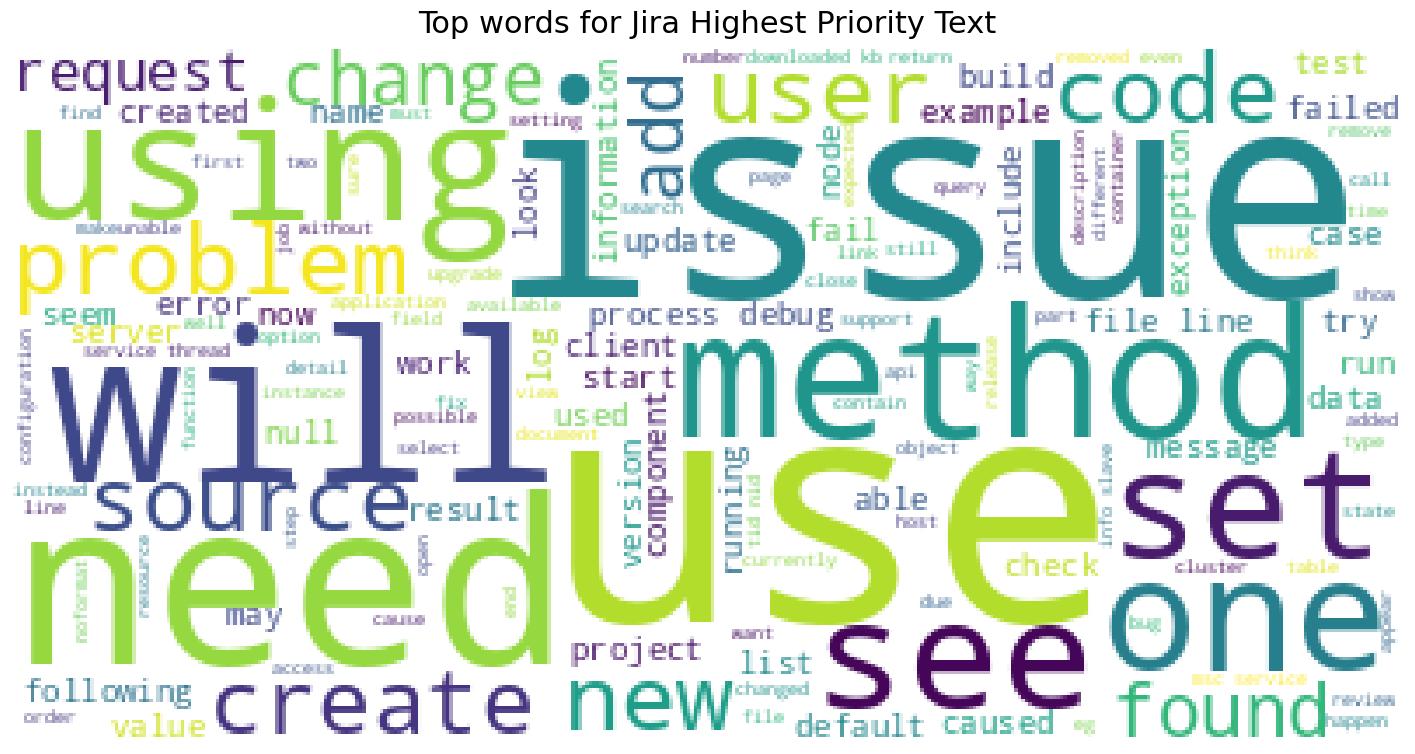

In [12]:
wc = WordCloud(
    background_color='white',
    max_words=200,
)
wc.generate(
    ' '.join(text for text in df.loc[df['label'] == 1, 'text']))
plt.figure(figsize=(18, 10))
plt.title('Top words for Jira Highest Priority Text',
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()


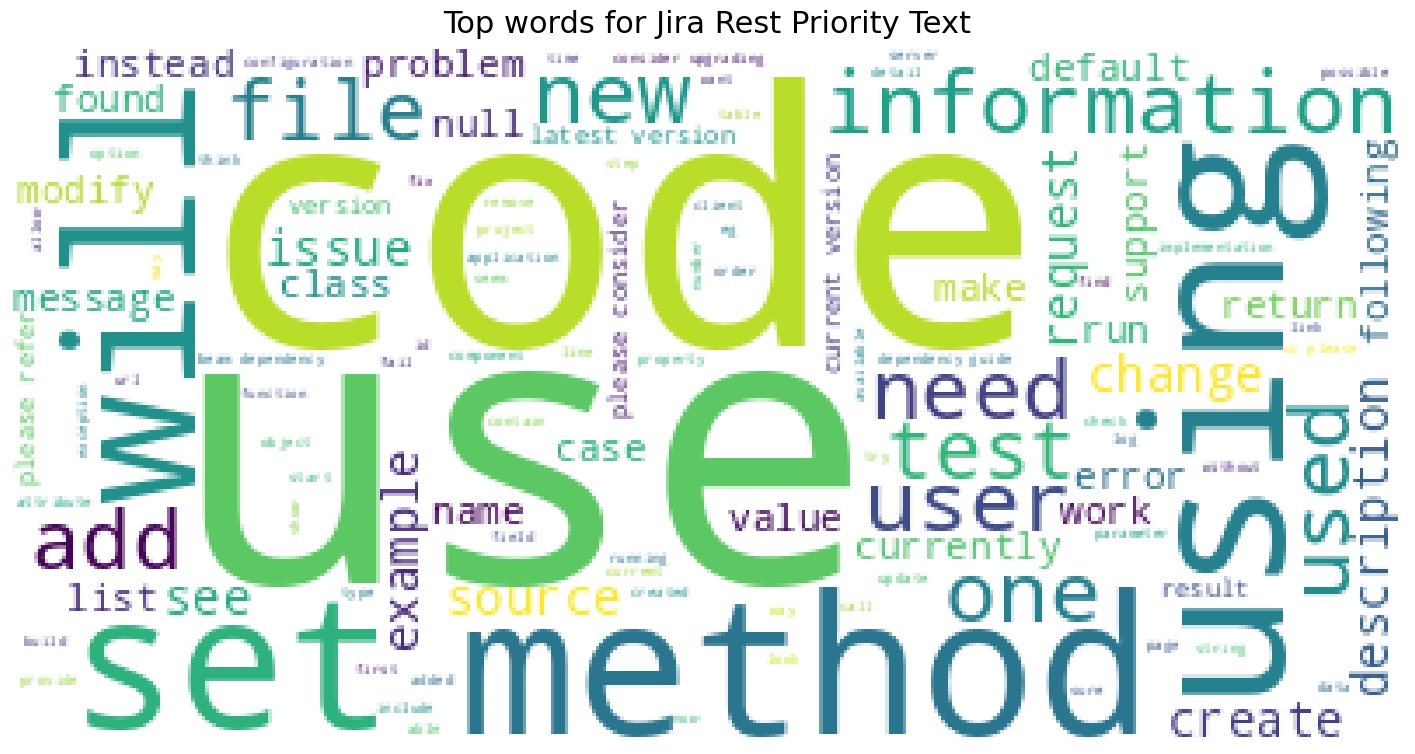

In [13]:
wc = WordCloud(
    background_color='white',
    max_words=200,
)
wc.generate(
    ' '.join(text for text in df.loc[df['label'] == 0, 'text']))
plt.figure(figsize=(18, 10))
plt.title('Top words for Jira Rest Priority Text',
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

In [14]:
top_debt_words = wc.generate(
    ' '.join(text for text in df.loc[df['label'] == 1, 'text']))


In [15]:
top_debt_words.words_

{'use': 1.0,
 'issue': 0.8473643560532922,
 'need': 0.8443715002896311,
 'will': 0.7482139409152346,
 'method': 0.747296775439274,
 'using': 0.7434832979339641,
 'one': 0.6789438115466306,
 'see': 0.6495462444487353,
 'set': 0.6292720602432902,
 'problem': 0.6157559374396602,
 'new': 0.6145974126279204,
 'user': 0.6097219540451825,
 'code': 0.6023846302374976,
 'create': 0.5778142498551844,
 'source': 0.5628982429040356,
 'change': 0.557346978181116,
 'add': 0.5546920254875458,
 'found': 0.5503958293106778,
 'request': 0.5480787796871983,
 'process debug': 0.518681212589303,
 'used': 0.5057926240586986,
 'test': 0.4715195983780653,
 'project': 0.4554450666151767,
 'following': 0.445066615176675,
 'fail': 0.43352963892643365,
 'run': 0.43232284224753814,
 'work': 0.4263371307202163,
 'start': 0.4233442749565553,
 'message': 0.41562077621162385,
 'case': 0.40915234601274375,
 'seem': 0.40683529638926436,
 'file line': 0.4009461285962541,
 'result': 0.39727746669241165,
 'server': 0.39500

In [32]:
top_debt_words_0 = wc.generate(
    ' '.join(text for text in df.loc[df['label'] == 0, 'text']))


In [33]:
top_debt_words_0.words_

{'use': 1.0,
 'code': 0.7956612717256694,
 'method': 0.7020113592689072,
 'using': 0.6957338685570312,
 'set': 0.6249733099884699,
 'will': 0.5905111671008242,
 'information': 0.5895716786949652,
 'one': 0.5871375496434215,
 'new': 0.5825255156510227,
 'user': 0.5809881709868898,
 'need': 0.5409318016825383,
 'add': 0.5338429346201478,
 'file': 0.5252594269120724,
 'used': 0.511935773156254,
 'test': 0.47849852671136356,
 'change': 0.47008583507708074,
 'create': 0.4603066148524576,
 'example': 0.45202203527351925,
 'see': 0.44702566511508735,
 'issue': 0.44040654225562625,
 'description': 0.4301148738096255,
 'request': 0.42439253533757526,
 'source': 0.42319682282102744,
 'currently': 0.418969124994662,
 'error': 0.3998377247298971,
 'return': 0.3924926335568177,
 'case': 0.38642866293718237,
 'name': 0.37818678737669215,
 'problem': 0.3679378229491395,
 'make': 0.36772430285689883,
 'instead': 0.36426527736259984,
 'default': 0.3637528291412222,
 'message': 0.35576717769142074,
 'va

In [16]:
df['text_len'] = df['text'].apply(lambda x: len(x.split(' ')))
df.head()


,label,text,text_len
0,1,we need to bump the version to example image e...,10
1,1,right now it is almost impossible to create se...,20
2,0,this is a followup of which contained two issu...,75
3,1,create a maven assembly to produce a zip file ...,34
4,0,suggestion slack bot that runs upstream should...,13


In [17]:
# Assuming 'text_len' is already calculated as shown previously
description = df['text_len'].describe()

# Applying formatting to make numbers more readable
formatted_description = description.apply(lambda x: f"{x:,.0f}")
print(formatted_description)

count    273,524
mean          83
std          278
min            1
25%           27
50%           52
75%           93
max       70,550
Name: text_len, dtype: object


In [18]:
df['text_len'].describe()

count    273524.000000
mean         83.023252
std         278.328605
min           1.000000
25%          27.000000
50%          52.000000
75%          93.000000
max       70550.000000
Name: text_len, dtype: float64

In [19]:
balance_counts = df.groupby('label')['label'].agg('count').values
balance_counts


array([136762, 136762])

In [20]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Bar(
    x=['Non-'],
    y=[balance_counts[0]],
    name='Non-TD',
    text=[balance_counts[0]],
    textposition='auto',
    marker_color=primary_blue
))
fig.add_trace(go.Bar(
    x=['TD'],
    y=[balance_counts[1]],
    name='TD',
    text=[balance_counts[1]],
    textposition='auto',
    marker_color=primary_grey
))
fig.update_layout(
    title='<span style="font-size:32px; font-family:Times New Roman">Dataset distribution by label</span>'
)
fig.show()


In [21]:
Non_df = df[df['label'] == 0]['text_len'].value_counts().sort_index()
df1 = df[df['label'] == 1]['text_len'].value_counts().sort_index()

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=Non_df.index,
    y=Non_df.values,
    name='Rest',
    fill='tozeroy',
    marker_color=primary_blue,
))
fig.add_trace(go.Scatter(
    x=df1.index,
    y=df1.values,
    name='Highest Priority',
    fill='tozeroy',
    marker_color=primary_grey,
))
fig.update_layout(
    title='<span style="font-size:32px; font-family:Times New Roman">Message length</span>'
)
fig.update_xaxes(range=[0, 300])
fig.show()


In [22]:
from nltk.util import ngrams
from plotly import tools
import plotly.offline as py
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /fp/homes01/u01/ec-
[nltk_data]     krimhau/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
#Gram analysis on Training set- Bigram and Trigram
stopword = set(stopwords.words('english'))


def gram_analysis(data, gram):
    tokens = [t for t in data.lower().split(
        " ") if t != "" if t not in stopword]
    ngrams = zip(*[tokens[i:] for i in range(gram)])
    final_tokens = [" ".join(z) for z in ngrams]
    return final_tokens


#Create frequency grams for analysis

def create_dict(data, grams):
    freq_dict = defaultdict(int)
    for sentence in data:
        for tokens in gram_analysis(sentence, grams):
            freq_dict[tokens] += 1
    return freq_dict


def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["n_gram_words"].values[::-1],
        x=df["n_gram_frequency"].values[::-1],
        showlegend=False,
        orientation='h',
        marker=dict(
            color=color,
        ),
    )
    return trace


def create_new_df(freq_dict,):
    freq_df = pd.DataFrame(sorted(freq_dict.items(), key=lambda z: z[1])[::-1])
    freq_df.columns = ['n_gram_words', 'n_gram_frequency']
   
    trace = horizontal_bar_chart(freq_df[:20], 'orange')
    return trace


def plot_grams(trace_zero, trace_one):
    fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                              subplot_titles=["Frequent words of Non_TD ",
                                              "Frequent words of TD"])
    fig.append_trace(trace_zero, 1, 1)
    fig.append_trace(trace_ones, 1, 2)
    fig['layout'].update(height=1200, width=900,
                         paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
    py.iplot(fig, filename='word-plots')


In [24]:
df_zero = df[df['label'] == 0]
df_ones= df[df['label'] == 1]

In [25]:
print("Bi-gram analysis")
freq_df_zero=create_dict(df_zero["text"],2)

Bi-gram analysis


In [26]:
trace_zero = create_new_df(freq_df_zero)
freq_df_ones = create_dict(df_ones["text"], 2)
trace_ones = create_new_df(freq_df_ones)


In [27]:
plot_grams(trace_zero, trace_ones)


/fp/homes01/u01/ec-krimhau/.local/lib/python3.11/site-packages/plotly/tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [28]:
print("Tri-gram analysis")
freq_df_zero = create_dict(df_zero["text"], 3)
trace_zero=create_new_df(freq_df_zero)
freq_df_ones = create_dict(df_ones["text"], 3)
trace_ones=create_new_df(freq_df_ones)
plot_grams(trace_zero,trace_ones)

Tri-gram analysis
